# Importing

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
file=pd.read_csv('diabetes.csv')

In [26]:
file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df=pd.DataFrame(file)

# EDA Process

#### Step 0

In [28]:
df.shape

(768, 9)

In [29]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Summary stats

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [30]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Step 1
Handling null values

In [31]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Step 2
Removing skewness

In [16]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

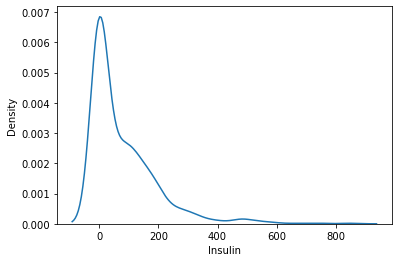

In [18]:
sns.kdeplot(df['Insulin'])

In [20]:
df['Insulin']=np.log(df['Insulin'])

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

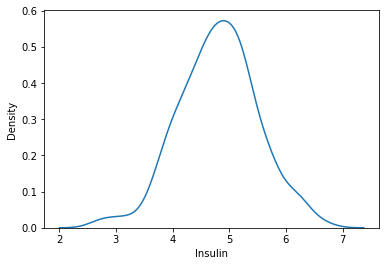

In [21]:
sns.kdeplot(df['Insulin'])

In [35]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
x=df.iloc[:,:-1]

In [37]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [38]:
y=df.iloc[:,-1]

In [40]:
x.shape

(768, 8)

In [41]:
y.shape

(768,)

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)

In [85]:
x_train.shape

(537, 8)

In [86]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
465,0,124,56,13,105,21.8,0.452,21
595,0,188,82,14,185,32.0,0.682,22
24,11,143,94,33,146,36.6,0.254,51
424,8,151,78,32,210,42.9,0.516,36
729,2,92,52,0,0,30.1,0.141,22
...,...,...,...,...,...,...,...,...
132,3,170,64,37,225,34.5,0.356,30
289,5,108,72,43,75,36.1,0.263,33
109,0,95,85,25,36,37.4,0.247,24
480,3,158,70,30,328,35.5,0.344,35


In [87]:
y_train.shape

(537,)

In [88]:
x_test.shape

(231, 8)

In [89]:
y_test.shape

(231,)

In [90]:
lg=LogisticRegression()

In [91]:
lg.fit(x_train,y_train)

LogisticRegression()

In [92]:
pred=lg.predict(x_test)

In [93]:
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [94]:
print(accuracy_score(y_test,pred))

0.7619047619047619


In [95]:
print(confusion_matrix(y_test,pred))

[[133  15]
 [ 40  43]]


In [96]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       148
           1       0.74      0.52      0.61        83

    accuracy                           0.76       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



In [107]:
def diabetespred(p):
    p=p.reshape(1,-1)
    pred=lg.predict(p)
    if pred==0:
        print('no diabetes')
    else:
        print('have diabetes')

In [108]:
x.shape

(768, 8)

In [109]:
p=np.array([1,1,1,1,1,1,1,1])

In [110]:
diabetespred(p)

no diabetes


In [111]:
p=np.array([0,1,2,3,0.1,0.4,1,3])

In [112]:
diabetespred(p)

no diabetes
